**Table of contents**<a id='toc0_'></a>    
- [Import Statements](#toc1_1_)    
- [Merging dataframes with a database-style join: The `df.merge()` method](#toc2_)    
    - [*Inner join*](#toc2_1_1_)    
    - [*Outer join*](#toc2_1_2_)    
    - [*Left join*](#toc2_1_3_)    
    - [*Right join*](#toc2_1_4_)    
  - [`->` Merging a dataframe with itself](#toc2_2_)    
- [Filtering joins: Filter observations from one dataframe based on whether or not they match an observation in another dataframe](#toc3_)    
    - [*Semi join*](#toc3_1_1_)    
    - [*Anti join*](#toc3_1_2_)    
- [The `pd.concat()` method: Adding multiple dataframes together along a certain axis](#toc4_)    
- [Merging ordered data: The `pd.merge_ordered()` method](#toc5_)    
- [Fuzzy matching of ordered data: The `pd.merge_asof()` method](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Read the official documentation on pandas DataFrames @ https://pandas.pydata.org/pandas-docs/stable/reference/frame.html**

**`Note:`** The notion of **chaining functions/methods** in pandas is similar to python.

DataFrames are **column oriented** unlike most common databases. And, **each column** in the dataframe is a **pandas series object**. So, any operation that can be performed on a pandas series object can be applied to a column too.

There are **two axes** for a dataframe commonly referred to as axis 0 and 1, or the **"index"** (or 'rows') axis and the **"columns"** axis respectively. Note that, when an **operation** is applied **along axis 0**, it is applied **down through all the rows for all the columns**. Likewise, operations **along axis 1** is applied **across the values in all the columns for all of the rows**.

### <a id='toc1_1_'></a>[Import Statements](#toc0_)

In [2]:
# import statements
import numpy as np
import pandas as pd

In [3]:
# view options
pd.set_option("display.max_columns", 14)
pd.set_option("display.max_rows", 8)

--------------------------------

## <a id='toc2_'></a>[Merging dataframes with a database-style join: The `df.merge()` method](#toc0_)

--------------------------------

The four common types of joins are, `inner`, `outer`, `left`, and `right` joins. The dataframe has two methods to support these operations, `.join()` and `.merge()`.

<img src="./imgs/merge_methods.png" width="450" height="400">

The *`df.merge()`* method can be used to merge DataFrame or named Series objects with a database-style join. But note that, a named Series object is treated as a DataFrame with a single named column.

<u> The ``.merge()`` method Parameters</u>

- `right:` object to merge with. 

    **Note:** The join is done on columns or indexes. If joining columns on columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes on indexes or indexes on a column or columns, the index will be passed on. Also if both key columns contain rows where the key is a null value, those rows will be matched against each other. This is different from usual SQL join behaviour and can lead to unexpected results.
- `on:` Column names to join on. String or list. These must be found in both DataFrames. (If on is None then, default is intersection of names). 
- `left_on:` Column names for left dataframe. String or list. Used when names don’t overlap.
- `right_on:` Column names for right dataframe. String or list. Used when names don’t overlap.
- `left_index:` Join based on left dataframe index. Boolean.
- `right_index:` Join based on right dataframe index. Boolean.
- `how:` Type of merge to be performed. {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’} default ‘inner’.
- `indicator:` Indicates where the data in the row come from {'left_only', 'right_only', 'both'}. Boolean or String.
    - indicator=True: pandas will create a column called _merge where the information will be shown.
    - If a string is passed, it will be the new column name rather than _merge.
- `validate:` Raise an error if the defined validation constraint is not met. `{'1:1', '1:m', or 'm:1', 'm:m'}` (m is for many, and m:m is always ignored) or, `{"one_to_one", "one_to_many", "many_to_one", "many_to_many"}`.


Often the .merge() method is preffered as, the .join() method is meant for joining based on the index rather than columns. And, in practice it is often the case that we join dataframes based on columns. To join dataframes based on columns using the .join() method, we first need to set the column we want to join based on as index using the .set_index() method.

**Note that,** we can also use the .merge() method to join based on indexes. If both the tables has same index column names then we just pass in the "on" argument with the index column name. Pandas will automatically detect if the column names in the "on" argument are columns or indexes. If the index column names are different then we need to pass in the "left_index" and "right_index" arguments with True along with the "left_on" and "right_on" arguments with the index column names.

<u>Example dataframes</u>

In [4]:
df1 = pd.DataFrame(
    {
        "ID": [1001, 1002, 1003, 1004, 1006, 1008],
        "FirstName": ["Hasan", "Dave", "Arafat", "Alice", "Zhang", "Yamale"],
        "Job": ["Student", "Teacher", "Web Developer", "Clerk", "Chef", "Footballer"],
    }
)

df2 = pd.DataFrame(
    {
        "ID": [1001, 1002, 1003, 1008, 1009, 1010],
        "FirstName": ["Hasan", "David", "Arafat", "Yamale", "John", "Harold"],
        "Age": [23, 48, 24, 16, 32, 35],
    }
)

In [5]:
df1

,ID,FirstName,Job
0,1001,Hasan,Student
1,1002,Dave,Teacher
2,1003,Arafat,Web Developer
3,1004,Alice,Clerk
4,1006,Zhang,Chef
5,1008,Yamale,Footballer


In [6]:
df2

,ID,FirstName,Age
0,1001,Hasan,23
1,1002,David,48
2,1003,Arafat,24
3,1008,Yamale,16
4,1009,John,32
5,1010,Harold,35


#### <a id='toc2_1_1_'></a>[*Inner join*](#toc0_)

An inner join selects and combines only the rows that have matching values in the specified columns (keys) from both the left and right dataframes i.e, it includes only the data entries that appear in both dataframes based on the merging columns.

In [7]:
df1.merge(df2, on=["ID", "FirstName"], how="inner")

,ID,FirstName,Job,Age
0,1001,Hasan,Student,23
1,1003,Arafat,Web Developer,24
2,1008,Yamale,Footballer,16


#### <a id='toc2_1_2_'></a>[*Outer join*](#toc0_)

An outer join combines data from both the left and right dataframes, including all rows from both sides. For matching entries it will not create duplicates but it fills in missing values with NaN (Not a Number) for non-matching entries in the merging columns. This type of join ensures that no data is lost, as it includes all available information from both dataframes while preserving their original shapes.

In [8]:
df1.merge(df2, how="outer").T

,0,1,2,3,4,5,6,7,8
ID,1001,1002,1003,1004,1006,1008,1002,1009,1010
FirstName,Hasan,Dave,Arafat,Alice,Zhang,Yamale,David,John,Harold
Job,Student,Teacher,Web Developer,Clerk,Chef,Footballer,NaN,NaN,NaN
Age,23.0,NaN,24.0,NaN,NaN,16.0,48.0,32.0,35.0


#### <a id='toc2_1_3_'></a>[*Left join*](#toc0_)

It includes all rows from the left dataframe and brings in corresponding data from the right dataframe. If there are no matches for some keys, the resulting dataframe will have NaN (Not a Number) values in the columns from the right dataframe. This method ensures that no data is lost from the left dataframe while incorporating relevant information from the right dataframe where possible. It is a useful technique for enriching or enhancing a dataset with additional information from a different table.

In [9]:
df1.merge(df2, how="left")

,ID,FirstName,Job,Age
0,1001,Hasan,Student,23.0
1,1002,Dave,Teacher,NaN
2,1003,Arafat,Web Developer,24.0
3,1004,Alice,Clerk,NaN
4,1006,Zhang,Chef,NaN
5,1008,Yamale,Footballer,16.0


#### <a id='toc2_1_4_'></a>[*Right join*](#toc0_)

A right join is the reverse of a left join. It includes all rows from the right dataframe and merges corresponding data from the left dataframe based on the specified columns (keys) where possible. If no matching entries are found in the merging columns, the resulting dataframe will contain NaN values in the left dataframe's columns. This method ensures that data from the right dataframe is preserved while incorporating relevant information from the left dataframe when available. It is a useful technique for enriching or enhancing a dataset with additional information from a different table.

In [10]:
df1.merge(df2, how="right")

,ID,FirstName,Job,Age
0,1001,Hasan,Student,23
1,1002,David,NaN,48
2,1003,Arafat,Web Developer,24
3,1008,Yamale,Footballer,16
4,1009,John,NaN,32
5,1010,Harold,NaN,35


<u>**Exercise**</u>

Below are two dataframes one of which defines the employees name and company name. The other defines some company name (in the ticker column) and their location. Get the location of each employee assuming the company location and the employee location is the same.


In [11]:
# example dataframes
employees = pd.DataFrame(
    {
        "name": ["Fred", "Johm", "Sally", "Annie"],
        "company": ["AMZN", "GOOG", "GOOG", "NFLX"],
    }
)
locations = pd.DataFrame(
    {
        "ticker": ["AMZN", "GOOG"],
        "location": ["Seattle", "SF"],
    }
)

In [12]:
employees

,name,company
0,Fred,AMZN
1,Johm,GOOG
2,Sally,GOOG
3,Annie,NFLX


In [13]:
locations

,ticker,location
0,AMZN,Seattle
1,GOOG,SF


In [14]:
# to get the location of each employee
employees.merge(
    locations,
    left_on="company",
    right_on="ticker",
    how="left",
    validate="m:1",
    indicator=True,
)

,name,company,ticker,location,_merge
0,Fred,AMZN,AMZN,Seattle,both
1,Johm,GOOG,GOOG,SF,both
2,Sally,GOOG,GOOG,SF,both
3,Annie,NFLX,NaN,NaN,left_only


### <a id='toc2_2_'></a>[`->` Merging a dataframe with itself](#toc0_)

Merging a DataFrame with itself is known as a self-join. It is not a different type of join rather pandas treats such merging as if two different copies of the same dataframe is merged. As such, it is similar to joining two different dataframes and we can also use different mergeing methods such as, *left, right, outer, inner* etc. 

Merging a dataframe to itself has several important use cases and it can be a powerful operation in data analysis when you want to compare or combine data within the same DataFrame.

**Example 01**

Let's say we have a csv file that lists the id of a movie, its title and also the id of its sequel (if any). Now if we wanted to see the title of the sequel of each movie in the same row we can use self join.

In [15]:
sequels = pd.read_csv("./Data/sequels.csv", dtype="str", na_values="<NA>").set_index(
    "id"
)

In [16]:
sequels.head()

,title,sequel
id,,
19995,Avatar,NaN
862,Toy Story,863
863,Toy Story 2,10193
597,Titanic,NaN
24428,The Avengers,NaN


In [17]:
sequels.merge(
    sequels,
    left_on="sequel",
    right_on="id",
    right_index=True,
    suffixes=("_orig", "_seq"),
)

,sequel,title_orig,sequel_orig,title_seq,sequel_seq
id,,,,,
862,863,Toy Story,863,Toy Story 2,10193
863,10193,Toy Story 2,10193,Toy Story 3,NaN


--------------------------------

## <a id='toc3_'></a>[Filtering joins: Filter observations from one dataframe based on whether or not they match an observation in another dataframe](#toc0_)

--------------------------------

So far, we have only worked with mutating joins, which combines data from two dataframes and returns all the columns from both the dataframes based on the joining method (inner, outer, left or right). However, filtering joins filter observations from one dataframe based on whether or not they match an observation in another dataframe. 

Note that, pandas dataframe objects has no direct method for filtering joins. We have to implement them manually.

<u> Data used for examples</u>

In [18]:
df1 = pd.DataFrame(
    {"A": ["A2", "A3", "A4"], "B": ["B2", "B3", "B4"], "C": ["C2", "C3", "C4"]}
)

In [19]:
df1

,A,B,C
0,A2,B2,C2
1,A3,B3,C3
2,A4,B4,C4


In [20]:
df2 = pd.DataFrame(
    {"D": ["D1", "D2", "D3", "D4", "D5"], "C": ["C1", "C2", "C2", "C4", "C5"]}
)

In [21]:
df2

,D,C
0,D1,C1
1,D2,C2
2,D3,C2
3,D4,C4
4,D5,C5


#### <a id='toc3_1_1_'></a>[*Semi join*](#toc0_)

A semi join filters the left table down to those observations that have a match in the right table. 

- It is similar to an inner join where only the **intersection** between the tables is returned, but unlike an inner join, **only the columns from the left** table are shown. 
- Finally, no duplicate rows from the left table are returned, even if there is a one-to-many relationship.

In [22]:
# first, we merge the left and right dataframe
merged_df = df1.merge(df2, on="C")
merged_df

,A,B,C,D
0,A2,B2,C2,D2
1,A2,B2,C2,D3
2,A4,B4,C4,D4


In [23]:
# next, we create a filter which will check if each key (elements in the "on" column) from the left table
# is present in the merged table
mask = df1["C"].isin(merged_df["C"])
mask

0     True
1    False
2     True
Name: C, dtype: bool

In [24]:
# after that, we use this mask to filter the left table
df1[mask]

,A,B,C
0,A2,B2,C2
2,A4,B4,C4


In [25]:
def semi_join(left_df: pd.DataFrame, right_df: pd.DataFrame, on: str):
    merged_df = left_df.merge(right_df, on=on)
    mask = left_df[on].isin(merged_df[on])
    return left_df[mask]

In [26]:
semi_join(df1, df2, "C")

,A,B,C
0,A2,B2,C2
2,A4,B4,C4


#### <a id='toc3_1_2_'></a>[*Anti join*](#toc0_)

An anti join returns the observations in the left table that do not have a matching observation in the right table but it only returns the columns from the left table.

In [27]:
def anti_join(left_df: pd.DataFrame, right_df: pd.DataFrame, on: str):
    merged_df = left_df.merge(right_df, on=on)
    mask = left_df[on].isin(merged_df[on])
    return left_df[~mask]

In [28]:
anti_join(df1, df2, on="C")

,A,B,C
1,A3,B3,C3


**`Note:`** For implementing these filtering joins we could've also used the `.merge()` method with the `indicator` parameter set to True. This will create a new column named `_merge` which will indicate whether the row is present in both dataframes or not (both, left_only, right_only). Then we can filter the dataframe based on the `_merge` column. 

Below we give an example of this approach (only for anti join, but the same can be done for semi join).

In [29]:
def anti_join_merge_method(left_df, right_df, on):
    merged = left_df.merge(right_df, on=on, how="left", indicator=True)
    mask = merged.loc[
        merged._merge == "left_only", on
    ]  # apply filtering condition and also select the "on" col
    return left_df[left_df[on].isin(mask)]

In [30]:
anti_join_merge_method(df1, df2, "C")

,A,B,C
1,A3,B3,C3


--------------------------------

## <a id='toc4_'></a>[The `pd.concat()` method: Adding multiple dataframes together along a certain axis](#toc0_)

--------------------------------

The concat method takes a sequence of Series or DataFrame objects and stiches them along a certain axis.

<u>Function Parameters and their usage</u>

- To **add rows** of different dataframes together, use concat along **axis=0**. 
- Note that, *.concat()* preserves index values, so the resulting dataframe is most likely to have duplicate indexes. To raise an error if there's duplicate index values use, **verify_integrity = True**. However, if you think that the existing index labels doesn't contain useful information and you want to create new monotonically increasing indexes use, **ignore_index = True**.
- To add labels to the resulting dataframe use, **keys = [list of labels]**. This will create a hierarchial index. Note that, you can't set *ignore_index = True* if you want to provide *keys*.
- To sort non-concatenation axis if it is not already aligned use, **sort = True**.
- By default the concat method will combine the common columns in the provided dataframes into single columns i.e, it won't create columns like colname_x, colname_y etc. like the merge method. For the columns that are not common in the dataframes, they will still be included and for indexes that doesn't have a value in a particular column, it will be filled with NaN. To change this behaviour use, **join = 'inner'**. This will only include the common columns in the resulting dataframe.

To **add columns** of different dataframes together, use concat along **axis=1**. However, using the .assign method is more prefferable.

In [31]:
# example dataframes
car_df1 = pd.DataFrame(
    {"name": ["John", "George", "Ringo"], "color": ["Blue", "Blue", "Purple"]}
)
car_df2 = pd.DataFrame(
    {"name": ["Paul", "George", "Ringo"], "carcolor": ["Red", "Blue", np.nan]},
    index=[3, 1, 2],
)

In [32]:
pd.concat([car_df1, car_df2], keys=["df1", "df2"])

name   color carcolor
df1 0    John    Blue      NaN
    1  George    Blue      NaN
    2   Ringo  Purple      NaN
df2 3    Paul     NaN      Red
    1  George     NaN     Blue
    2   Ringo     NaN      NaN

--------------------------------

## <a id='toc5_'></a>[Merging ordered data: The `pd.merge_ordered()` method](#toc0_)

--------------------------------

The `pd.merge(left, right, on, left_on, right_on, left_by, right_by, how, fill_method, suffixes)` method is used for merging ordered data like time series data. It is similar to the `pd.merge()` method but it has some additional parameters. For example, it offers optional filling/interpolation for missing data. Unlike the *df.merge()* method it can also perform group-wise merging. But the pd.merge_ordered() method can't be used to merge dataframes based on indexes (well that's natuaral since sorted indexes doesn't necessarily represent sorted data).

<u>Function Parameters</u>

- `fill_method:` *{'ffill', None}*, default None. Interpolation method for filling Nan values. When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.
- `how:` *{'left', 'right', 'outer', 'inner'}*, default 'outer' (in df.merge the default is 'inner').

**Example 01** 

Let's say we have two datasets. One lists the GDP of USA from 2010 to 2018. The other one lists the returns of the S&P 500 companies from 2008 to 2017 (the data we have is mostly oredered but some entries are not ordered by data as they should be). We believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. We want to verify that hypothesis.

In [33]:
gdp = pd.read_csv("./Data/us_gdp.csv", index_col="id")
sp500 = pd.read_csv("./Data/sp_500_returns.csv", index_col="id")

In [34]:
# note that, the data for year 2012 is duplicated but has a different index label
gdp.head()

,country code,year,gdp
id,,,
3,USA,2010,1.499000e+13
7,USA,2011,1.554000e+13
11,USA,2012,1.620000e+13
15,USA,2012,1.620000e+13
19,USA,2013,1.678000e+13


In [35]:
# note that, the data for year 2013 is not after 2012 rather at the very end
sp500.tail()

,date,returns
id,,
5,2014,11.39
6,2015,-0.73
7,2016,9.54
8,2017,19.42
9,2013,29.60


In [36]:
# We use merge_ordered() to merge gdp and sp500 (so that the years are all sorted)
# we also interpolate missing value for they year 2018 in the sp500 df
gdp_sp500 = pd.merge_ordered(
    gdp, sp500, left_on="year", right_on="date", how="left", fill_method="ffill"
)

In [37]:
gdp_sp500.head()

,country code,year,gdp,date,returns
0,USA,2010,1.499000e+13,2010,12.78
1,USA,2011,1.554000e+13,2011,0.00
2,USA,2012,1.620000e+13,2012,13.41
3,USA,2012,1.620000e+13,2012,13.41
4,USA,2013,1.678000e+13,2013,29.60


In [38]:
# next we ubset the gdp and returns columns
gdp_returns = gdp_sp500.loc[:, ["gdp", "returns"]]

# calculating correlation between gdp and returns
print(gdp_returns.corr())

              gdp   returns
gdp      1.000000  0.211734
returns  0.211734  1.000000


**Example 02** 

We have two different datasets about the GDP and Population information of Australia and Sweden. The GDP information is quarterly and the Population information is Yearly. We would like to know how the two countries gdp per capita (i.e, gdp/pop) changed over the years and how do they compare with each other.

In [39]:
gdp = pd.read_csv("./Data/aus_swd_gdp.csv", index_col="id", parse_dates=["date"])
pop = pd.read_csv("./Data/aus_swd_pop.csv", index_col="id", parse_dates=["date"])

In [40]:
gdp.shape

(32, 4)

In [41]:
gdp.head()

,date,country,gdp,series_code
id,,,,
0,1990-01-01,Australia,158051.132,NYGDPMKTPSAKD
1,1990-04-01,Australia,158263.582,NYGDPMKTPSAKD
2,1990-07-01,Australia,157329.279,NYGDPMKTPSAKD
3,1990-09-01,Australia,158240.678,NYGDPMKTPSAKD
4,1991-01-01,Australia,156195.954,NYGDPMKTPSAKD


In [42]:
pop

,date,country,pop,series_code
id,,,,
0,1990-01-01,Australia,17065100,SP.POP.TOTL
1,1991-01-01,Australia,17284000,SP.POP.TOTL
2,1992-01-01,Australia,17495000,SP.POP.TOTL
3,1993-01-01,Australia,17667000,SP.POP.TOTL
4,1990-01-01,Sweden,8558835,SP.POP.TOTL
5,1991-01-01,Sweden,8617375,SP.POP.TOTL
6,1992-01-01,Sweden,8668067,SP.POP.TOTL
7,1993-01-01,Sweden,8718561,SP.POP.TOTL


In [43]:
# First we need to merge the two dataframes together on the date and country columns
# to ensure that correct country data is selected for merging

# Since the two dataframes have different date frequencies we can either use resampling or we can just use
# the fill_method = "ffill" in the pd.merge_ordered() method

# But be careful because we have to pass the column names in proper order otherwise ffill will use incorect values
# Since the pop table has less rows and the country column is a categorical one we pass on = ["country", "date"]

gdp_pop = pd.merge_ordered(gdp, pop, on=["country", "date"], fill_method="ffill")

In [44]:
gdp_pop.head()

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.132,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-04-01,Australia,158263.582,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
2,1990-07-01,Australia,157329.279,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
3,1990-09-01,Australia,158240.678,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
4,1991-01-01,Australia,156195.954,NYGDPMKTPSAKD,17284000,SP.POP.TOTL


In [45]:
# see the contrast with on=['date', 'country']
# this is because after merging the data is sorted first by date and then by country (pay attention to date col)
# after that filling is applied
pd.merge_ordered(gdp, pop, on=["date", "country"], fill_method="ffill").head()

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.132,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-01-01,Sweden,79837.846,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
2,1990-04-01,Australia,158263.582,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
3,1990-04-01,Sweden,80582.286,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
4,1990-07-01,Australia,157329.279,NYGDPMKTPSAKD,8558835,SP.POP.TOTL


In [46]:
# next we add a column calculating gdp_per_capita
gdp_pop["gdp_per_capita"] = gdp_pop["gdp"] / gdp_pop["pop"]

In [47]:
gdp_pop.head()

,date,country,gdp,series_code_x,pop,series_code_y,gdp_per_capita
0,1990-01-01,Australia,158051.132,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009262
1,1990-04-01,Australia,158263.582,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009274
2,1990-07-01,Australia,157329.279,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009219
3,1990-09-01,Australia,158240.678,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009273
4,1991-01-01,Australia,156195.954,NYGDPMKTPSAKD,17284000,SP.POP.TOTL,0.009037


In [48]:
# We pivot the data so index is date and columns is country and values is gdp_per_capita
gdp_pivot = gdp_pop.pivot_table("gdp_per_capita", "date", "country")
gdp_pivot.head()

country,Australia,Sweden
date,,
1990-01-01,0.009262,0.009328
1990-04-01,0.009274,0.009415
1990-07-01,0.009219,0.009344
1990-09-01,0.009273,0.009360
1991-01-01,0.009037,0.009228


<Axes: xlabel='date'>

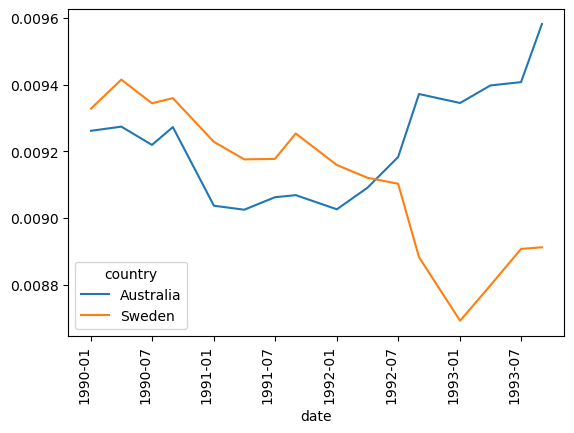

In [49]:
gdp_pivot.plot(rot=90)

--------------------------------

## <a id='toc6_'></a>[Fuzzy matching of ordered data: The `pd.merge_asof()` method](#toc0_)

--------------------------------

Another method for merging ordered data is the `pd.merge_asof(left, right, on, left_on, right_on, left_index, right_index, suffixes, direction)` method. This is similar to a left-join except that we match on nearest key rather than equal keys. Note that before merging both DataFrames must be sorted by the key. It is mainly used for fuzzy matching of dates between dataframes.

**Example 01** 

Let's say we have a feed of stock market prices. We attempted to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes but not exactly 5 minutes. We pulled data for two banks, JP Morgan (JPM) and Bank Of America (BAC). We want to know how the price change of the two banks compare.

In [50]:
jpm = pd.read_csv(
    "./Data/jpm.csv", index_col="id", parse_dates=["date_time"]
).sort_values(by="date_time")
bac = pd.read_csv(
    "./Data/bac.csv", index_col="id", parse_dates=["date_time"]
).sort_values(by="date_time")

In [51]:
jpm.head()

,date_time,close
id,,
0,2017-11-17 15:35:17,98.120
1,2017-11-17 15:40:04,98.180
2,2017-11-17 15:45:01,97.731
3,2017-11-17 15:50:55,97.740
4,2017-11-17 15:55:00,97.815


In [52]:
bac.head()

,date_time,close
id,,
0,2017-11-17 15:35:17,26.552
1,2017-11-17 15:40:06,26.552
2,2017-11-17 15:45:05,26.388
3,2017-11-17 15:50:34,26.378
4,2017-11-17 15:55:06,26.383


In [53]:
merged_forward = pd.merge_asof(
    jpm, bac, on="date_time", suffixes=("_jpm", "_bac"), direction="forward"
)

In [54]:
merged_forward.head()

,date_time,close_jpm,close_bac
0,2017-11-17 15:35:17,98.120,26.552
1,2017-11-17 15:40:04,98.180,26.552
2,2017-11-17 15:45:01,97.731,26.388
3,2017-11-17 15:50:55,97.740,26.383
4,2017-11-17 15:55:00,97.815,26.383


In [55]:
merged_forward_diff = merged_forward.diff()

In [56]:
merged_forward_diff.head()

,date_time,close_jpm,close_bac
0,NaT,NaN,NaN
1,0 days 00:04:47,0.060,0.000
2,0 days 00:04:57,-0.449,-0.164
3,0 days 00:05:54,0.009,-0.005
4,0 days 00:04:05,0.075,0.000


<Axes: >

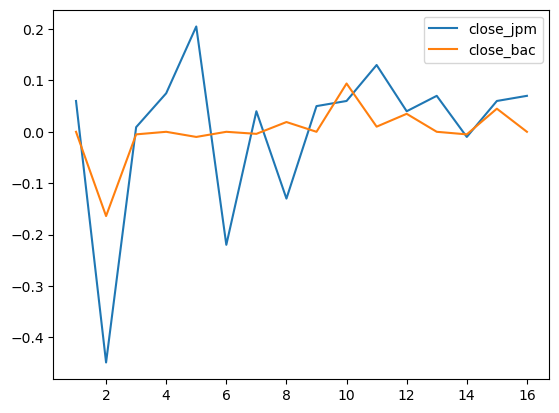

In [57]:
merged_forward_diff.plot(kind="line", y=["close_jpm", "close_bac"])